#Plotting with Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

##Change the predefined style used by `matplotlib` and `pandas`

In [2]:
#check the available pre-defined styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [16]:
#change the style
plt.style.use('ggplot')

##Plot a DataFrame

In [17]:
#set the random seed to reproduce data
np.random.seed(123)

#create the DF
df = pd.DataFrame({'A': np.random.randn(365).cumsum(0), #cumulatively summing up
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20},
                   index = pd.date_range('1/1/2021', periods=365))

df.head()

,A,B,C
2021-01-01,-1.085631,20.059291,-20.230904
2021-01-02,-0.088285,21.803332,-16.659325
2021-01-03,0.194693,20.835588,-17.055481
2021-01-04,-1.311601,21.255156,-17.093802
2021-01-05,-1.890202,21.462083,-19.518638


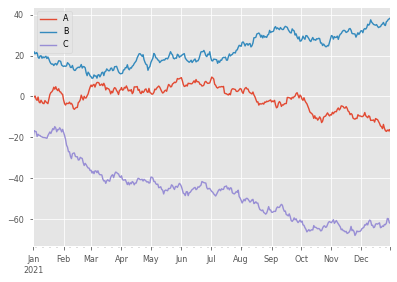

In [18]:
#plot the df
df.plot(); #use the semicolon to surpress unwanted outputs

The plot method on series and DataFrame is just a simple wrapper around `plt.plot`. So when we call `df.plot`, we get a line graph of all the columns in the data frame with labels.

In fact, we can **specify the kind of plot** that we want the `df.plot` method to plot for use by calling the `kind` parameter.

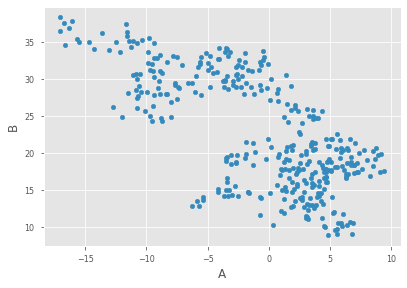

In [19]:
#create a scatter plot using the A and B columns
df.plot('A', 'B', kind='scatter');

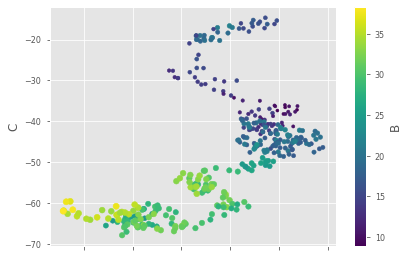

In [20]:
#create a scatter plot using the A and C columns
#the size and color of data points vary with the correspondent value in C
df.plot.scatter('A', 'C', 
                c='B', cmap='viridis', 
                s='B');

We can modify the plot created by `df.plot` the same way we modify objects retured bt `plt.plot`.

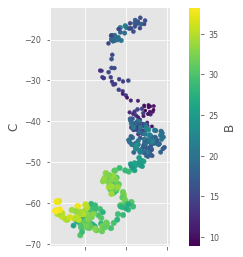

In [21]:
ax = df.plot.scatter('A', 'C', c='B', s='B', cmap='viridis')

#set the aspect ratio of A and C to be equal
ax.set_aspect('equal');

We can see that the range of C is much wider than that of A.

We can also do different kinds of plots.

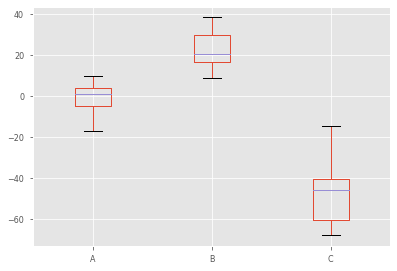

In [23]:
#boxplot
df.plot.box();

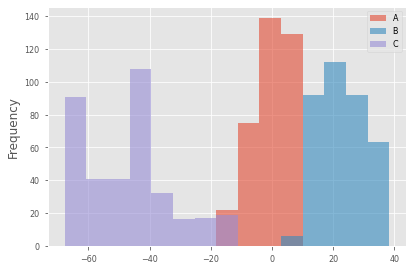

In [25]:
#hist
df.plot.hist(alpha=0.6, bins=15);

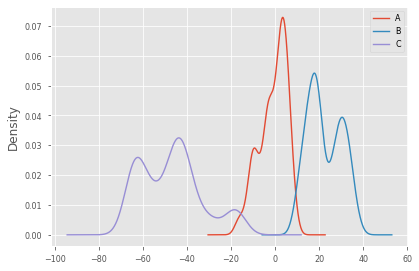

In [27]:
#kernel density
df.plot.kde();

##Using pd.tools.plotting

In [28]:
iris = pd.read_csv('/content/drive/MyDrive/Applied Plotting for Python/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


###ScatterMatrix

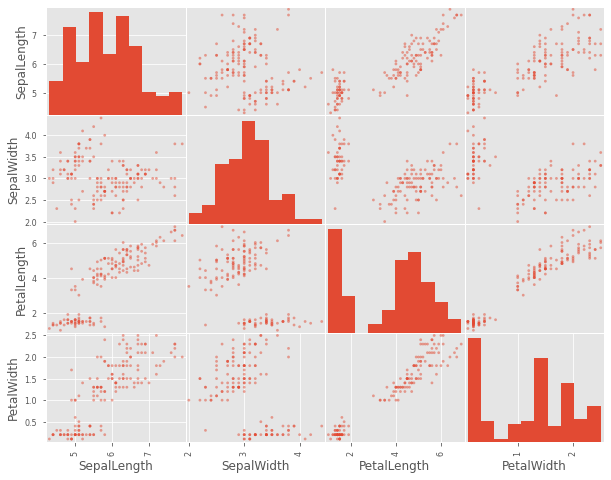

In [38]:
pd.plotting.scatter_matrix(iris, figsize=(10,8));

###Parallel Coordinate Plots

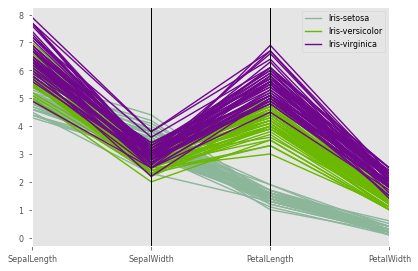

In [39]:
pd.plotting.parallel_coordinates(iris, 'Name');

From this graph, we can easily see that `PetalLength` splits the three species fairly clearly.

#Plotting with Seaborn

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [42]:
#set random seed and generate random numbers
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')

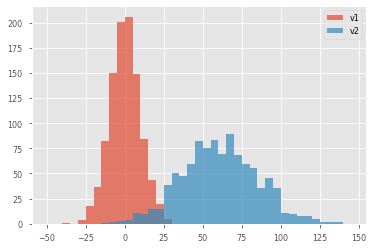

In [45]:
#using plt
plt.figure()
plt.hist(v1, alpha=0.7, label='v1', bins=np.arange(-50,150,5)) #ensure the identical bin edge
plt.hist(v2, alpha=0.7, label='v2', bins=np.arange(-50,150,5))
plt.legend(loc=0);

##KdePlot

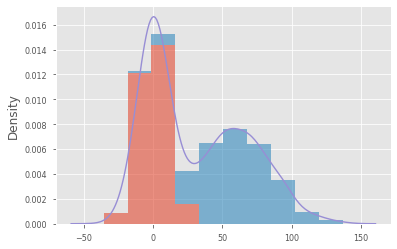

In [51]:
plt.figure()
plt.hist([v1,v2], alpha=0.6, density=True, histtype='barstacked')

#add a density curve using seaborn
v3 = np.concatenate((v1,v2))
sns.kdeplot(v3);

##DistPlot

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


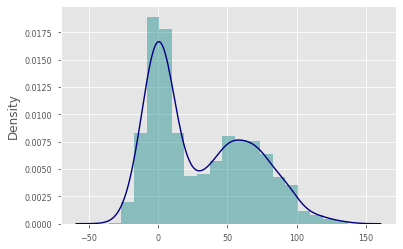

In [58]:
plt.figure()
_ = sns.distplot(v3,
            hist_kws={'color': 'Teal'},
            kde_kws={'color': 'Navy'})

##JointPlot

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


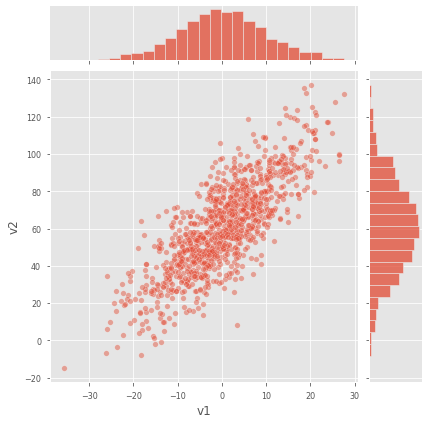

In [60]:
sns.jointplot(v1, v2, alpha=0.45);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


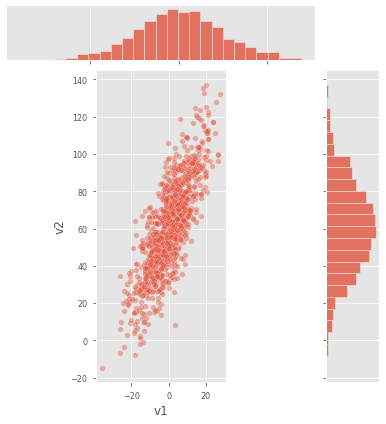

In [62]:
#use matplotlib to further tweak the plot
grid = sns.jointplot(v1, v2, alpha=0.4);
grid.ax_joint.set_aspect('equal');

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


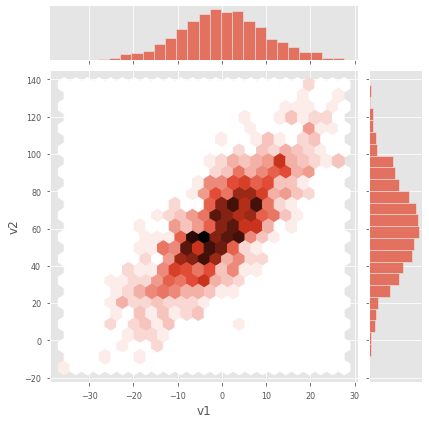

In [63]:
#switch to hex
sns.jointplot(v1, v2, kind='hex');

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


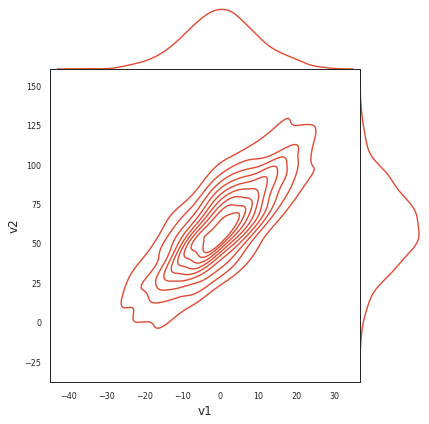

In [64]:
#switch to two dimensional KDE plots
sns.set_style('white')

sns.jointplot(v1, v2, kind='kde', space=0);

##Example: Using the Iris Data

In [65]:
iris = pd.read_csv('/content/drive/MyDrive/Applied Plotting for Python/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


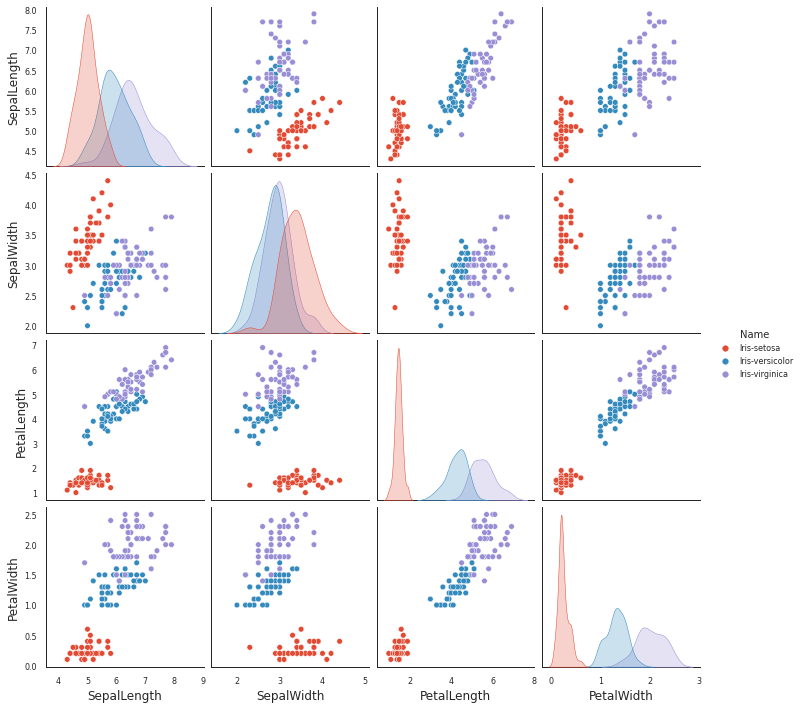

In [66]:
#scatter matrix
sns.pairplot(iris, hue='Name', diag_kind='kde')

###Violin Plot

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


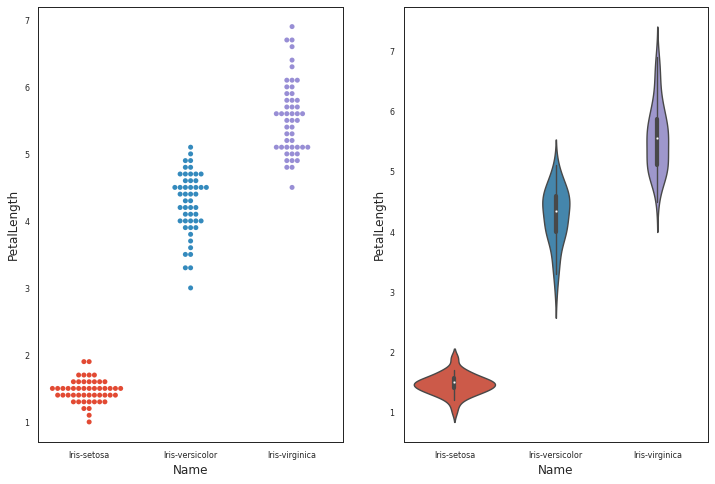

In [67]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.swarmplot('Name', 'PetalLength', data=iris);

plt.subplot(1,2,2)
sns.violinplot('Name', 'PetalLength', data=iris);